# LinearRegression и LogisticRegression

Реализовать 2 класса LinearRegression и LogisticRegression

In [1]:
class LinearRegression():
    def __init__(self):
        self.W = 
    def linear_activation(x):
        return (x > 0)*1
    def fit(self):
        pass
    def predict(self):
        pass
    def fit_predict(self):
        pass

In [2]:
class LogisticRegression():
    def __init__(self):
        pass
    def sigmoid_activation(x):
        return 1.0 / (1 + np.exp(-x))
    def fit(self):
        pass
    def predict(self):
        pass
    def fit_predict(self):
        pass

In [142]:
import time
import pandas as pd
import numpy as np

df = pd.read_csv('./data/cs-training.csv', sep=',')
df = df.dropna()
X = df.as_matrix(columns=df.columns[1:])
y = df.as_matrix(columns=df.columns[:1])
y = y.reshape(y.shape[0])
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0


In [12]:
x = np.copy(X)
# x.T[:1] = 1
t1 = time.time()
beta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print(time.time() - t1)
print(beta)

0.019939422607421875
[  1.00000000e+00   2.05140792e-22   1.92551765e-18  -1.29020059e-17
   7.21301494e-21  -2.53737653e-22   3.07091795e-18   9.81202966e-17
   1.06522863e-17  -9.35666475e-17  -9.10052199e-18]


In [10]:
beta.shape

(11,)

In [13]:
x[21].dot(beta)

1.4935929364714378e-16

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    return theta


def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 10)
print(x)
print(y)
m, n = np.shape(x)
numIterations= 100
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)

[[  1.   0.]
 [  1.   1.]
 [  1.   2.]
 [  1.   3.]
 [  1.   4.]
 [  1.   5.]
 [  1.   6.]
 [  1.   7.]
 [  1.   8.]
 [  1.   9.]
 [  1.  10.]
 [  1.  11.]
 [  1.  12.]
 [  1.  13.]
 [  1.  14.]
 [  1.  15.]
 [  1.  16.]
 [  1.  17.]
 [  1.  18.]
 [  1.  19.]
 [  1.  20.]
 [  1.  21.]
 [  1.  22.]
 [  1.  23.]
 [  1.  24.]
 [  1.  25.]
 [  1.  26.]
 [  1.  27.]
 [  1.  28.]
 [  1.  29.]
 [  1.  30.]
 [  1.  31.]
 [  1.  32.]
 [  1.  33.]
 [  1.  34.]
 [  1.  35.]
 [  1.  36.]
 [  1.  37.]
 [  1.  38.]
 [  1.  39.]
 [  1.  40.]
 [  1.  41.]
 [  1.  42.]
 [  1.  43.]
 [  1.  44.]
 [  1.  45.]
 [  1.  46.]
 [  1.  47.]
 [  1.  48.]
 [  1.  49.]
 [  1.  50.]
 [  1.  51.]
 [  1.  52.]
 [  1.  53.]
 [  1.  54.]
 [  1.  55.]
 [  1.  56.]
 [  1.  57.]
 [  1.  58.]
 [  1.  59.]
 [  1.  60.]
 [  1.  61.]
 [  1.  62.]
 [  1.  63.]
 [  1.  64.]
 [  1.  65.]
 [  1.  66.]
 [  1.  67.]
 [  1.  68.]
 [  1.  69.]
 [  1.  70.]
 [  1.  71.]
 [  1.  72.]
 [  1.  73.]
 [  1.  74.]
 [  1.  75.]
 [  1.  76.]

(120269, 10)
(120269,)
(120269, 11)
0.494908422137
0.493926968009
0.497250005658
0.495236669411
0.495335480544
1 [  1.00000000e+00   7.66126609e-01   4.50000000e+01   2.00000000e+00
   8.02982129e-01   9.12000000e+03   1.30000000e+01   0.00000000e+00
   6.00000000e+00   0.00000000e+00   2.00000000e+00]
1 0


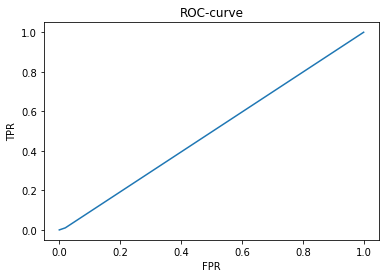

In [125]:
class LinearRegression():
    def __init__(self):
        self.W = np.random.uniform(size=(1, ))
        self.fitted = False

    def linear_activation(self, x):
        return (x > 0)*1

    def fit(self, X, y):
        if not self.fitted:
            # self.W = np.random.uniform(size=(X.shape[1],))
            self.W = np.ones((X.shape[1], ))
            self.fitted = True
        epoch = 0
        alpha = 0.001
        while 1:
            epoch += 1
            alpha /= epoch
            preds = self.linear_activation(np.dot(X, self.W))
            error = (preds - y)
            loss = np.sum(error ** 2)
            gradient = 2 * X.T.dot(error) / X.shape[0]
            oldW = np.copy(self.W)
            self.W += - alpha * gradient
            eps = np.linalg.norm(self.W - oldW)
            if eps < 0.001:
                break
            # print(eps)
        # print(self.W)

    def predict(self, X):
        return (self.linear_activation(X.dot(self.W)) > 0) * 1

    def fit_predict(self):
        pass
    
gkf = KFold(n_splits=5, shuffle=True)

print(X.shape)
print(y.shape)

X1 = np.c_[np.ones((X.shape[0])), X]
print(X1.shape)

lin = LinearRegression()

for train, test in gkf.split(X1, y):
    X_train, y_train = X1[train], y[train]
    X_test, y_test = X1[test], y[test]

    lin.fit(X_train, y_train)
    print(roc_auc_score(y_score=lin.predict(X_test), y_true=y_test))

print(y[0], X1[0])
print(y[0], lin.predict(X1[0]))
WW = lin.W

y_score=lin.predict(X1)
fpr, tpr, _ = metrics.roc_curve(y_score=lin.predict(X_test), y_true=y_test)
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-curve')
plt.show()

In [130]:
np.dot(X1[22],WW)

-26177.162169227271

In [131]:
print(y[22], X1[2])

1 [  1.00000000e+00   6.58180140e-01   3.80000000e+01   1.00000000e+00
   8.51133750e-02   3.04200000e+03   2.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]


In [126]:
WW

array([ 0.99890978,  0.99036028,  0.93867749,  1.00142678,  0.57449829,
       -5.61254491,  0.9902867 ,  1.00139856,  0.99892424,  1.00115224,
        0.99932115])

In [132]:
X1[22]

array([  1.00000000e+00,   3.92248482e-01,   5.00000000e+01,
         0.00000000e+00,   1.59525337e+00,   4.67600000e+03,
         1.40000000e+01,   0.00000000e+00,   3.00000000e+00,
         0.00000000e+00,   1.00000000e+00])

In [98]:
from sklearn.metrics import roc_auc_score

def linear_activation(x):
    return (x > 0)*1

def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

W = np.array([ 0.60037721,  0.57890594, -0.40114193])

print(sigmoid_activation(np.dot(X[3], W)))
print(y)

print(np.dot(X[3], W))

0.816791200515
[1 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0
 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0]
1.49475701046


In [144]:
Xn = (X - X.min()) / X.ptp(0)
X1 = np.c_[np.ones((Xn.shape[0])), Xn]
W = np.array([-1.598197,    0.08926611, -0.723938,    0.68892601,  0.55897006,  0.38774741,
  0.41486352,  0.91474139, -0.00213997,  0.76551091,  0.24011971])
print(y[34], X1[13].dot(W))

0 -1.97251333288
